In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
import seaborn as sns
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

# 데이터 선정

* 공공데이터 포털에서 csv 파일 검색

# 데이터 읽기

In [81]:
df = pd.read_csv("국민건강보험공단_당뇨병의료이용률_20231231.CSV", encoding='cp949')
df.head(20)

,지표연도,시도,시군구,지표명,분모(명),분자(명),지표값(퍼센트)
0,2023,전국,전체,당뇨병의료이용률,51064994,4870159,9.54
1,2023,서울특별시,전체,당뇨병의료이용률,9427029,813683,8.63
2,2023,서울특별시,종로구,당뇨병의료이용률,143726,12855,8.94
3,2023,서울특별시,중구,당뇨병의료이용률,123894,11714,9.45
4,2023,서울특별시,용산구,당뇨병의료이용률,216960,17959,8.28
5,2023,서울특별시,성동구,당뇨병의료이용률,280822,23991,8.54
6,2023,서울특별시,광진구,당뇨병의료이용률,343954,27997,8.14
7,2023,서울특별시,동대문구,당뇨병의료이용률,341531,32756,9.59
8,2023,서울특별시,중랑구,당뇨병의료이용률,380612,40582,10.66
9,2023,서울특별시,성북구,당뇨병의료이용률,427777,39489,9.23


In [82]:
df.columns

Index(['지표연도', '시도', '시군구', '지표명', '분모(명)', '분자(명)', '지표값(퍼센트)'], dtype='object')

In [83]:
df['시도'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [84]:
df.시도.value_counts()

시도
경기도        43
서울특별시      26
경상북도       25
전라남도       23
경상남도       23
강원도        19
충청남도       17
부산광역시      17
전라북도       16
충청북도       15
인천광역시      11
대구광역시       9
대전광역시       6
광주광역시       6
울산광역시       6
제주특별자치도     3
세종특별자치시     2
전국          1
Name: count, dtype: int64

* 비고열이 범주형 분석에 가장 적합하고 추가 분석이 가능함

# 데이터 기본 분석

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지표연도      268 non-null    int64  
 1   시도        268 non-null    object 
 2   시군구       268 non-null    object 
 3   지표명       268 non-null    object 
 4   분모(명)     268 non-null    int64  
 5   분자(명)     268 non-null    int64  
 6   지표값(퍼센트)  268 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.8+ KB


# 데이터 전처리

* 결측치
* 이상치
* 중복데이터

In [86]:
df_g=df[df['시군구'] == '전체']
df_g

,지표연도,시도,시군구,지표명,분모(명),분자(명),지표값(퍼센트)
0,2023,전국,전체,당뇨병의료이용률,51064994,4870159,9.54
1,2023,서울특별시,전체,당뇨병의료이용률,9427029,813683,8.63
27,2023,부산광역시,전체,당뇨병의료이용률,3259808,336380,10.32
44,2023,대구광역시,전체,당뇨병의료이용률,2318105,222507,9.60
53,2023,인천광역시,전체,당뇨병의료이용률,2964211,288201,9.72
64,2023,광주광역시,전체,당뇨병의료이용률,1411754,121782,8.63
70,2023,대전광역시,전체,당뇨병의료이용률,1416626,128528,9.07
76,2023,울산광역시,전체,당뇨병의료이용률,1104873,96518,8.74
82,2023,세종특별자치시,전체,당뇨병의료이용률,369237,23503,6.37
84,2023,경기도,전체,당뇨병의료이용률,13593887,1210929,8.91


In [87]:
df_gg=df[(df['시군구'] == '전체') & (df['시도'] != '전국')]
df_gg

,지표연도,시도,시군구,지표명,분모(명),분자(명),지표값(퍼센트)
1,2023,서울특별시,전체,당뇨병의료이용률,9427029,813683,8.63
27,2023,부산광역시,전체,당뇨병의료이용률,3259808,336380,10.32
44,2023,대구광역시,전체,당뇨병의료이용률,2318105,222507,9.60
53,2023,인천광역시,전체,당뇨병의료이용률,2964211,288201,9.72
64,2023,광주광역시,전체,당뇨병의료이용률,1411754,121782,8.63
70,2023,대전광역시,전체,당뇨병의료이용률,1416626,128528,9.07
76,2023,울산광역시,전체,당뇨병의료이용률,1104873,96518,8.74
82,2023,세종특별자치시,전체,당뇨병의료이용률,369237,23503,6.37
84,2023,경기도,전체,당뇨병의료이용률,13593887,1210929,8.91
127,2023,강원도,전체,당뇨병의료이용률,1453389,172166,11.85


# 분석용 데이터 변환

* value_counts()
* 사용자 정의 전처리: apply()

* 비고열 분석

In [93]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 265
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지표연도      18 non-null     int64  
 1   시도        18 non-null     object 
 2   시군구       18 non-null     object 
 3   지표명       18 non-null     object 
 4   분모(명)     18 non-null     int64  
 5   분자(명)     18 non-null     int64  
 6   지표값(퍼센트)  18 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ KB


In [104]:
df_g['시도']#.value_counts().index.tolist()

0           전국
1        서울특별시
27       부산광역시
44       대구광역시
53       인천광역시
64       광주광역시
70       대전광역시
76       울산광역시
82     세종특별자치시
84         경기도
127        강원도
146       충청북도
161       충청남도
178       전라북도
194       전라남도
217       경상북도
242       경상남도
265    제주특별자치도
Name: 시도, dtype: object

In [109]:
df_g['지표값(퍼센트)'].value_counts().index.tolist()

[8.63,
 9.54,
 10.32,
 9.6,
 9.72,
 9.07,
 8.74,
 6.37,
 8.91,
 11.85,
 10.58,
 10.62,
 11.09,
 11.93,
 11.24,
 9.55,
 8.19]

# 시각화

### Bar 차트

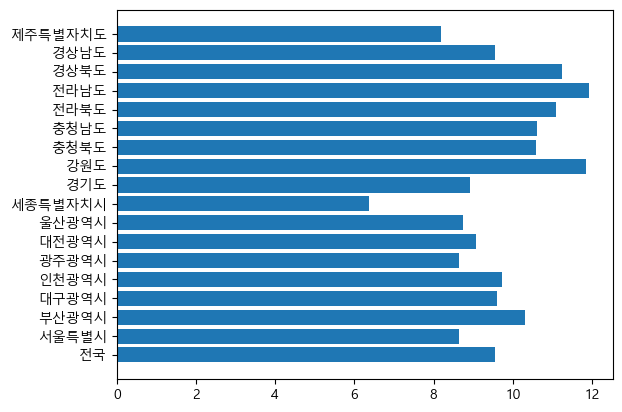

In [126]:
#range_list = df.비고.value_counts().index.tolist()
range_list = df_g['시도'].value_counts().index.tolist()
y = np.arange(len(range_list))
values = df_g['지표값(퍼센트)']
plt.barh(y, values)
plt.yticks(y, range_list)
plt.show()

* 상위 카테고리 분석

* 상세 카테고리 분석

### 파이차트

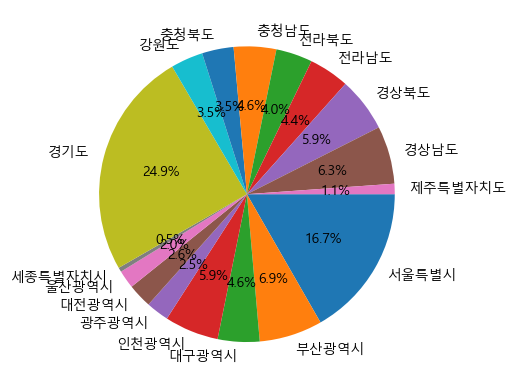

In [115]:
# counterclock=False => 반시계방향의 반대, 즉 시계방향으로 데이터 회전
values =df_gg['분자(명)']
range_list = df_gg['시도'].value_counts().index.tolist()
plt.pie(values, labels=range_list, autopct='%.1f%%', startangle=0, counterclock=False)
plt.show()

In [ ]:
ax1 = plt.subplot(1,2,1)
sns.lineplot(data=df, x='시도', y='지표값(퍼센트)', hue='', errorbar=None)
ax2 = plt.subplot(1,2,2, sharey=ax1)
sns.lineplot(data=df, x='시도', y='지표값(퍼센트)', hue='', errorbar=None)
plt.tight_layout()
plt.show()

# 데이터 분석  
* 차트에 대한 해석